# Root finder and non-linear solvers.

The growth of a population can often be modeled over short periods of time by assuming that the population grows continuously with time at a rate proportional to the number present at that time. Suppose $N(t)$ denotes the number in the population at time $t$ and $\lambda$ denotes the constant birthrate of the population. Then, the population satisfies the differential equation

$
\frac{dN(t)}{dt} = \lambda N(t)
$

whose solution is $N(t) = N_0 e^{\lambda t}$, where $N_0$ denotes the initial population.

The exponential population growth model is valid only when the population is isolated, with no immigration. If immigration is permitted at a constant rate $\nu$, then the differential equation becomes

$
\begin{align*}
\frac{dN(t)}{dt} &= \lambda N(t) + \nu\\
\frac{dN(t)}{dt} - \lambda N(t) &=  \nu
\end{align*}
$

We can solve this first order linear differential equation with constant coefficients analytically. The integrating factor for the ODE is,

$
e^{\int [a_0(x)/a_1(x)]dx} = e^{-\int \lambda dt} = e^{-\lambda t}
$

Multiplying throughout, we have:

$
\begin{align*}
\frac{dN(t)}{dt}e^{-\lambda t} - \lambda N(t)e^{-\lambda t} &=  \nu e^{-\lambda t}\\
dN(t)e^{-\lambda t} - \lambda N(t)e^{-\lambda t} dt &= \nu e^{-\lambda t}dt\\
d(N(t)e^{-\lambda t}) &= \nu e^{-\lambda t}dt \\
\int_{0}^{t} d(N(t)e^{-\lambda t}) &= \nu \int_{0}^{t} e^{-\lambda t}dt \\
N(t)e^{-\lambda t} - N(0) &= \nu \left(\frac{e^{-\lambda t}}{-\lambda}\right) + \frac{\nu}{\lambda}\\
N(t)e^{-\lambda t}  &= N(0) +\frac{\nu}{\lambda}(1 - e^{-\lambda t})\\
N(t) &= N(0)e^{\lambda t} + \frac{\nu}{\lambda}(e^{\lambda t} - 1)
\end{align*}
$

Suppose that a certain population contains $N(0) = 1000000$ individuals initially, that $435,000$ individuals immigrate into the community in the first year, and that $N(1) = 1,564,000$ individuals are present at the end of the year. To determine the birthrate of this population, we need to find $\lambda$ in the equation:

$$
1,564,000 = 1,000,000 e^{\lambda} + \frac{435,000}{\lambda}(e^{\lambda} - 1)
$$

It is not possible to solve explcitly for $\lambda$ in this equation, but numerical methods can be used to approximate the solutions of equations of this type to an arbitrarily high accuracy.

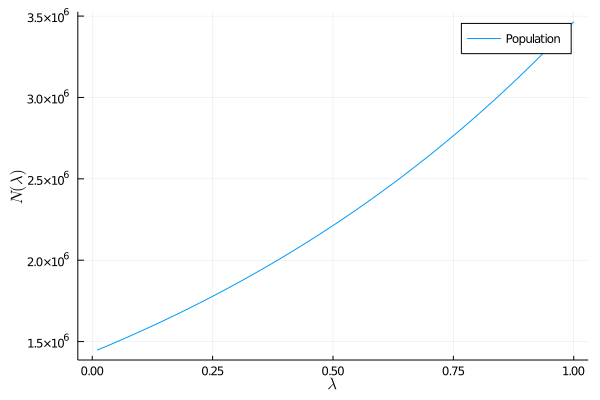

In [21]:
using Plots
using LaTeXStrings

f(λ) = 1000000 * exp(λ) + 435000/λ * (exp(λ) - 1)
λ = range(0.0,length=101,stop=1.0)
y = map(x -> f(x),λ)
plot(λ,y,label="Population", ylabel = L"N(\lambda)", xlabel = L"\lambda")

## Intermediate Value Theorem.

For two real numbers $a$ and $b$ with $a < b$, let $f$ be a continuous function on the closed interval $[a,b]$. Then, for every $y_0$ between $f(a)$ and $f(b)$ there exists a number $x_0$ in $[a,b]$ such that $f(x_0) = y_0$.

*Proof*.

Let $f:[a,b] \to \mathbb{R}$ be a continuous function. Let $y$ be a number between $f(a)$ and $f(b)$. Suppose without loss of generality, $f(a) \le f(b)$ and consider

$$
S = \{x \in [a,b] : f(x) \le y \}
$$

Then, $S$ is non-empty since, $a \in S$. $S$ has an upper bound $b$, and by AoC, $S$ has a least upper bound. Call that least upper bound $c = \sup S$. 

We claim that $f(c) = y$.

Suppose that $f(c) > y$. Let $\epsilon = f(c) - y > 0$. By continuity of $f$, there is a $\delta > 0$ such that $\lvert x - c \rvert < \delta$ implies $\lvert f(x) - f(c) \rvert < \epsilon$. But, $\lvert f(x) - f(c) \rvert < \epsilon$ implies that $\lvert f(x) \rvert > \lvert f(c) \rvert - \epsilon = y$ for all $x$ in the $(c-\delta,c+\delta)$. So, no $x$'s in this $\delta$-neighbourhood, $V_\delta(c)$ lie in $S$. So, $c - \delta$ is also an upper bound for $S$. This contradicts the least upper bound property.

Suppose that $f(c) < y$. Let $\epsilon = y - f(c) > 0$. By continuity of $f$, there is a $\delta > 0$ such that $\lvert x - c \rvert < \delta$ implies $\lvert f(x) - f(c) \rvert < \epsilon$. But, $\lvert f(x) - f(c) \rvert < \epsilon$ implies that $\lvert f(x) \rvert < \lvert f(c) \rvert + \epsilon = y$ for all $x$ in the $(c-\delta,c+\delta)$. So, every $x$ in this $\delta$-neighbourhood, $V_\delta(c)$ lies in $S$. So, $c + \delta$ is also in $S$. This contradicts the least upper bound property.

Therefore, $f(c) = y$ as desired.

In [36]:
# The Bisection method

function root_bisect(f::Function, a::Float64, b::Float64, ϵ::Float64)
    N_0 = 40
    
    for i in 1:N_0
        fa = f(a)
        fb = f(b)
        p = a + (b - a)/2
        fp = f(p)
        
        println("n = ", i, "\ta_n = ", a, "\tb_n = ", b, "\tp_n = ", p, "\tf(p_n) = ", fp)
        
        if fp == 0 || (b - a)/2 < ϵ
            return p
        else
            i = i + 1
        end
        
        # Bracket the root
        if fa * fp > 0
            a = p
        else
            b = p
        end
    end
end

root_bisect (generic function with 1 method)

In [37]:
# Determine the root of f(x) = x^3 + 4x^2 - 10 in the interval [1,2]
f(x) = x^3 + 4x^2 - 10
root_bisect(f, 1.0, 2.0, 1e-4)

n = 1	a_n = 1.0	b_n = 2.0	p_n = 1.5	f(p_n) = 2.375
n = 2	a_n = 1.0	b_n = 1.5	p_n = 1.25	f(p_n) = -1.796875
n = 3	a_n = 1.25	b_n = 1.5	p_n = 1.375	f(p_n) = 0.162109375
n = 4	a_n = 1.25	b_n = 1.375	p_n = 1.3125	f(p_n) = -0.848388671875
n = 5	a_n = 1.3125	b_n = 1.375	p_n = 1.34375	f(p_n) = -0.350982666015625
n = 6	a_n = 1.34375	b_n = 1.375	p_n = 1.359375	f(p_n) = -0.09640884399414062
n = 7	a_n = 1.359375	b_n = 1.375	p_n = 1.3671875	f(p_n) = 0.03235578536987305
n = 8	a_n = 1.359375	b_n = 1.3671875	p_n = 1.36328125	f(p_n) = -0.03214997053146362
n = 9	a_n = 1.36328125	b_n = 1.3671875	p_n = 1.365234375	f(p_n) = 7.202476263046265e-5
n = 10	a_n = 1.36328125	b_n = 1.365234375	p_n = 1.3642578125	f(p_n) = -0.01604669075459242
n = 11	a_n = 1.3642578125	b_n = 1.365234375	p_n = 1.36474609375	f(p_n) = -0.007989262812770903
n = 12	a_n = 1.36474609375	b_n = 1.365234375	p_n = 1.364990234375	f(p_n) = -0.003959101522923447
n = 13	a_n = 1.364990234375	b_n = 1.365234375	p_n = 1.3651123046875	f(p_n) = -0.0019

1.36517333984375

**Theorem**. Suppose that $f \in C[a,b]$ and $f(a)\cdot f(b) < 0$. The bisection method generates a convergent sequence $\{p_n\}_{n=1}^{\infty}$ approximating a root $p$ of $f$ with 

$$
\lvert p_n - p \rvert \le \frac{b-a}{2^n}
$$

*Proof*.

For each $n \ge 1$, we have:

$
b_n - a_n = \frac{1}{2^{n-1}}(b-a)
$

and $p \in (a_n,b_n)$.

Since, $p_n = \frac{1}{2}(a_n + b_n)$ for all $n \ge 1$, it follows that the distance between $p_n$ and $p$ must be smaller than $1/2$ times the length of bracketing interval $[a_n,b_n]$

$
\lvert p_n - p \rvert \le \frac{1}{2}(b_n - a_n) = \frac{b - a}{2^n}
$

We choose $N \in \mathbf{N}$ such that $\frac{b - a}{2^n} < \epsilon$, that is 

$$
N > \log_2 \left( \frac{b-a}{\epsilon} \right)
$$

Then, given any $\epsilon > 0$, there exists $N(\epsilon)$ such that the distance $\lvert p_n - p \rvert < \epsilon$ for all $n \ge N$. Thus, the sequence $\{p_n\}_{n=0}^{\infty}$ converges. Thus, Bisection must succeed.

Thus, we know in advance the number of iterations required to achieve a given tolerance in the solution. 

In [41]:
# An approximation of 25^(1/3).

f(x) = x^3 - 25
root_bisect(f, 2.0, 3.0, 1e-4)

n = 1	a_n = 2.0	b_n = 3.0	p_n = 2.5	f(p_n) = -9.375
n = 2	a_n = 2.5	b_n = 3.0	p_n = 2.75	f(p_n) = -4.203125
n = 3	a_n = 2.75	b_n = 3.0	p_n = 2.875	f(p_n) = -1.236328125
n = 4	a_n = 2.875	b_n = 3.0	p_n = 2.9375	f(p_n) = 0.347412109375
n = 5	a_n = 2.875	b_n = 2.9375	p_n = 2.90625	f(p_n) = -0.452972412109375
n = 6	a_n = 2.90625	b_n = 2.9375	p_n = 2.921875	f(p_n) = -0.054920196533203125
n = 7	a_n = 2.921875	b_n = 2.9375	p_n = 2.9296875	f(p_n) = 0.14570951461791992
n = 8	a_n = 2.921875	b_n = 2.9296875	p_n = 2.92578125	f(p_n) = 0.045260727405548096
n = 9	a_n = 2.921875	b_n = 2.92578125	p_n = 2.923828125	f(p_n) = -0.0048631951212882996
n = 10	a_n = 2.923828125	b_n = 2.92578125	p_n = 2.9248046875	f(p_n) = 0.020190398208796978
n = 11	a_n = 2.923828125	b_n = 2.9248046875	p_n = 2.92431640625	f(p_n) = 0.007661509909667075
n = 12	a_n = 2.923828125	b_n = 2.92431640625	p_n = 2.924072265625	f(p_n) = 0.0013986345293233171
n = 13	a_n = 2.923828125	b_n = 2.924072265625	p_n = 2.9239501953125	f(p_n) = -0.0

2.92401123046875

## Fixed-point iteration

**Definition**. The number $p$ is called a **fixed point** for a given function $g$ if $g(p) = p$.

- Given a root-finding problem $f(p) = 0$, we can define functions $g$ with a fixed point at $p$ in a number of ways, for example as

$g(x) = x - f(x)$ or as $g(x) = x + 3f(x)$

- Conversely, if the function $g$ has a fixed point at $p$, then the function defined by 

$f(x) = x - g(x)$

has a zero at $p$. 

Thus, root finding problems and fixed-point problems are equivalent classes of problems. Although the problem that we wish to solve are in the root-finding form, the fixed-point form is easier to analyse, and certain fixed-point choices lead to powerful root-finding techniques. 

We first need to become comfortable with this new type of problem and to decide when a function has a fixed point and how the fixed points can be approximated to within the specified accuracy.

**Example**. Determine any fixed points of the function $g(x) = x^2 - 2$. 

*Solution.* A fixed point $p$ for $g$ has the property that 

$p = g(p) = p^2 - 2$ which implies that

$\begin{align*}
p^2 - p - 2 &= 0\\
p^2 - 2p + p - 2 &= 0 \\
p(p-2) + 1(p - 2) &= 0\\
(p+1)(p-2) &= 0
\end{align*}$

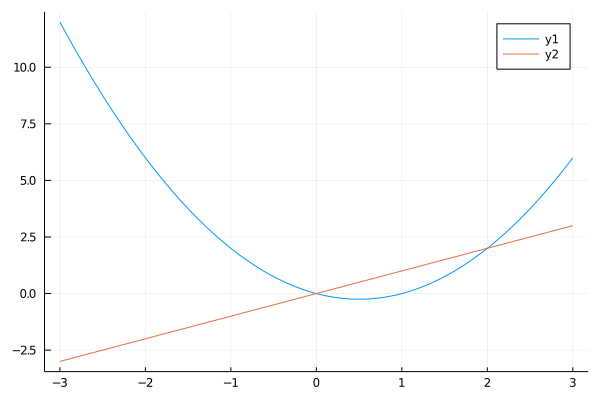

In [48]:
x = range(-3.0,length=601,stop=3.0)
y1 = x.^2 - x
y2 = x
plot(x,[y1,y2])

A fixed point of $g$ occurs precisely when the graph of $y = g(x)$ intersects the graph of $y = x$, so $g$ has two fixed points, one at $p = -1$ and the other at $p = 2$. The following theorem gives sufficient conditions for existence and uniqueness of a fixed point.

**Theorem**. *Fixed Point Theorem.*

(i) If $g \in C[a,b]$ and $g(x) \in [a,b]$ for all $x \in [a,b]$, then $g$ has atleast one fixed point in $[a,b]$.

(ii) If in addition, $g'(x)$ exists on $(a,b)$ and a positive constant $k < 1$ exists with 

$
\lvert g'(x) \rvert \le k
$

that is, the first derivative is bounded in the interval $(a,b)$, then there is exactly one fixed point in $[a,b]$. 

<img src="./images/fixed_point_theorem.jpg">

*Proof*.

If $g(a) = a$ or $g(b) = b$, then $g$ has a fixed point at an endpoint. If not $g(a) > a$ and $g(b) < b$. The function $h(x)= g(x) - x$ is continuous on $[a,b]$, with

$
\begin{align*}
h(a) &= g(a) - a > 0\\
h(b) &= g(b) - b < 0
\end{align*}
$

The intermediate value theorem implies that there exists atleast one point $p \in [a,b]$ such that $h(p) = 0$. This number $p$ is a fixed point for $g$ because 

$h(p) = 0 \Longleftrightarrow g(p) - p = 0 \implies g(p) = p$ 

(ii) Suppose in addition, that $\lvert g'(x) \le k < 1\rvert$. By contradiction, suppose that $p$ and $q$ are both fixed points in $[a,b]$. If $p \ne q$, then the Mean Value Theorem implies that a number $\xi$ exists between $p$ and $q$ and hence in $[a,b]$ with

$
\frac{g(p) - g(q)}{p - q} = g'(\xi)
$

Thus, the distance

$
\lvert p - q \rvert = \lvert g(p) - g(q) \vert = \lvert g'(\xi)(p-q) \rvert = \lvert g'(\xi)\rvert \lvert(p-q) \rvert \le k \lvert(p-q) \rvert < \lvert(p-q) \rvert
$

which is a contradiction. Hence, our initial assumption is false. $p = q$, and hence the fixed point in $[a,b]$ is unique.

The hypotheses of the Fixed-point theorem are sufficient to guarantee a unique fixed-point but are not necessary. That is the converse is not true. A function may have a unique fixed-point, yet fail to satisfy the conditions (i) and (ii) of the Fixed-point theorem.

**Fixed Point Iteration**. 

We cannot explicitly determine the fixed point, because we have no way to solve for $p$ in the equation $p = g(p) = 3^-p$. We can, however, determine the approximations to this fixed point to any specified degree of accuracy. We now consider, how this can be done. 

To approximate the fixed point of a function $g$, we choose an initial approximation $p_0$ and generate the sequence $\{p_n\}_{n=0}^{\infty}$ by letting $p_n = g(p_{n-1})$, for each $n \ge 1$. If the sequence converges to $p$ and is continuous, 

$
p = \lim_{n \to \infty} p_n = \lim_{n \to infty} g(p_{n-1}) =  g(\lim_{n \to infty} p_{n-1}) = g(p)
$

and a solution to $x = g(x)$ is obtained. This technique is called as fixed-point or functional iteration. The procedure is illustrated graphically below.

<img src="./images/fixed_point_iteration.jpg">

In [61]:
# Fixed point iteration algorithm

function fixed_point(g, p_0::Float64, ϵ)
    N_0 = 40
    M = 1e10
    
    for i in 1:N_0
        
        # Compute p_i
        p = g(p_0)
        
        # Check for divergence
        if p == NaN || p > M
            println("The sequence diverged!")
            return
        end
        
        println("n = ", i, "\t p_n = ", p)
        
        if abs(p - p_0) < ϵ
            # The procedure was successful
            return p
        end
        
        # Update p_0
        p_0 = p
    end
end

fixed_point (generic function with 2 methods)

The equation $x^3 + 4x^2 - 10=0$ has a unique root in $(1,2)$. There are many ways to change the equation to the fixed-point form $x = g(x)$ using simple algebraic manipulation. For the example, to obtain the function $g$, we can manipulation the equation $x^3 + 4x^2 - 10 = 0$ as follows:

$
\begin{align*}
x^3 + 4x^2 - 10 &= 0\\
4x^2 &= 10 - x^3\\
x^2 &= \frac{10 - x^3}{4}\\
x &= \left[\frac{10 - x^3}{4}\right]^{1/2}\\
&= \frac{1}{2} [10 - x^3]^{1/2}
\end{align*}
$

There are many other functions $g(x)$ that we could write. It is easy to verify that the fixed point of each is a solution to the original equation $x^3 + 4x^2 - 10 = 0$.

(a) $x = g_1(x) = x - (x^3 + 4x^2 - 10)$

(b) 

$
\begin{align*}
x^3 + 4x^2 - 10 &= 0\\
x^3 &= 10 - 4x^2\\
x^2 &= \frac{10}{x} - 4x\\
x &= \left(\frac{10}{x} - 4x\right)^{1/2}
\end{align*}
$

(c)  $x = g_3(x) = \frac{1}{2}(10 - x^3)^{1/2}$

(d) 

$
\begin{align*}
x^3 + 4x^2 - 10 &= 0\\
x^3 + 4x^2&= 10 \\
x^2(x + 4)&= 10 \\
x^2 &= \frac{10}{x+4}\\
x &= \left(\frac{10}{x+4}\right)^{1/2}
\end{align*}
$

(e) 

$
\begin{align*}
g_5(x) &= x - \frac{f(x)}{f'(x)}\\
g(x) &= x - \frac{x^3 + 4x^2 - 10 }{3x^2 + 8x}
\end{align*}
$


In [73]:
# Running fixed point iteration with p_0 = 1.5 and different functional forms

g_1(x) = x - (x^3 + 4x^2 - 10)
fixed_point(g_1, 1.50, 1e-9)

n = 1	 p_n = -0.875
n = 2	 p_n = 6.732421875
n = 3	 p_n = -469.72001200169325
n = 4	 p_n = 1.0275455518738511e8
n = 5	 p_n = -1.0849338705317464e24
The sequence diverged!


In [72]:
g_2(x) = (10/x - 4*x)^0.50
fixed_point(g_2, 1.50, 1e-9)

n = 1	 p_n = 0.8164965809277263
n = 2	 p_n = 2.99690880578722


LoadError: DomainError with -8.650863686861433:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [71]:
g_3(x) = 0.50*(10 - x^3)^0.50
fixed_point(g_3, 1.50, 1e-9)

n = 1	 p_n = 1.286953767623375
n = 2	 p_n = 1.4025408035395783
n = 3	 p_n = 1.3454583740232942
n = 4	 p_n = 1.3751702528160383
n = 5	 p_n = 1.360094192761733
n = 6	 p_n = 1.3678469675921328
n = 7	 p_n = 1.3638870038840212
n = 8	 p_n = 1.36591673339004
n = 9	 p_n = 1.364878217193677
n = 10	 p_n = 1.365410061169957
n = 11	 p_n = 1.3651378206692129
n = 12	 p_n = 1.3652772085244786
n = 13	 p_n = 1.3652058502970472
n = 14	 p_n = 1.3652423837188388
n = 15	 p_n = 1.3652236802252822
n = 16	 p_n = 1.3652332557424998
n = 17	 p_n = 1.365228353462627
n = 18	 p_n = 1.3652308632436367
n = 19	 p_n = 1.3652295783339587
n = 20	 p_n = 1.3652302361581812
n = 21	 p_n = 1.3652298993777325
n = 22	 p_n = 1.3652300717962909
n = 23	 p_n = 1.365229983524674
n = 24	 p_n = 1.3652300287163228
n = 25	 p_n = 1.36523000557995
n = 26	 p_n = 1.3652300174248766
n = 27	 p_n = 1.365230011360733
n = 28	 p_n = 1.3652300144653395
n = 29	 p_n = 1.3652300128759012
n = 30	 p_n = 1.365230013689632


1.365230013689632

In [74]:
g_4(x) = (10/(4 + x))^0.50
fixed_point(g_4, 1.50, 1e-9)

n = 1	 p_n = 1.348399724926484
n = 2	 p_n = 1.3673763719912828
n = 3	 p_n = 1.364957015402487
n = 4	 p_n = 1.3652647481134421
n = 5	 p_n = 1.365225594160525
n = 6	 p_n = 1.3652305756734338
n = 7	 p_n = 1.3652299418781833
n = 8	 p_n = 1.3652300225155685
n = 9	 p_n = 1.365230012256122
n = 10	 p_n = 1.3652300135614253
n = 11	 p_n = 1.3652300133953523


1.3652300133953523

In [75]:
g_5(x) = x - (x^3 + 4*x^2 - 10)/(3*x^2 + 8*x)
fixed_point(g_5, 1.50, 1e-9)

n = 1	 p_n = 1.3733333333333333
n = 2	 p_n = 1.3652620148746266
n = 3	 p_n = 1.3652300139161466
n = 4	 p_n = 1.3652300134140969


1.3652300134140969

It is interesting to note that (a) was divergent, (b) became undefined because it involved the square root of a negative number.

Although various functions that are given are fixed-point problems for the same root-finding problem, they differ vastly as techniques for approximating the solution to the root-finding problem. Their purpose is to illustrate what needs to be answer.

*Question. How can we find a fixed-point problem that produces a sequence that reliably and rapidly converges to a solution given a root-finding problem?*

The following theorem and its corollary should give us some clues concerning the paths we should pursue and perhaps more important, some we should reject.

**Theorem**. *Fixed-Point Theorem.*

